# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

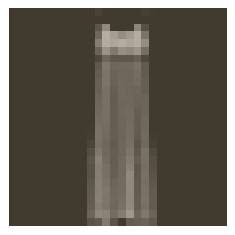

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [5]:
# TODO: Define your network architecture here
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x  = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim = 1)
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [15]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.01)

In [16]:
# TODO: Train the network here

epochs =  3
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images,labels in iter(trainloader):
        
        steps +=1
        # Flatten the image 784 long vector
        images.resize_(images.size()[0], 784)
        optimizer.zero_grad()
        
        # forward and backward passes 
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss +=loss.item()
        
        if step % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
        
            running_loss = 0

Epoch: 1/3...  Loss: 0.0535
Epoch: 1/3...  Loss: 0.0520
Epoch: 1/3...  Loss: 0.0525
Epoch: 1/3...  Loss: 0.0541
Epoch: 1/3...  Loss: 0.0528
Epoch: 1/3...  Loss: 0.0542
Epoch: 1/3...  Loss: 0.0517
Epoch: 1/3...  Loss: 0.0522
Epoch: 1/3...  Loss: 0.0521
Epoch: 1/3...  Loss: 0.0529
Epoch: 1/3...  Loss: 0.0520
Epoch: 1/3...  Loss: 0.0543
Epoch: 1/3...  Loss: 0.0527
Epoch: 1/3...  Loss: 0.0538
Epoch: 1/3...  Loss: 0.0536
Epoch: 1/3...  Loss: 0.0539
Epoch: 1/3...  Loss: 0.0524
Epoch: 1/3...  Loss: 0.0529
Epoch: 1/3...  Loss: 0.0539
Epoch: 1/3...  Loss: 0.0536
Epoch: 1/3...  Loss: 0.0523
Epoch: 1/3...  Loss: 0.0529
Epoch: 1/3...  Loss: 0.0525
Epoch: 1/3...  Loss: 0.0510
Epoch: 1/3...  Loss: 0.0534
Epoch: 1/3...  Loss: 0.0525
Epoch: 1/3...  Loss: 0.0529
Epoch: 1/3...  Loss: 0.0519
Epoch: 1/3...  Loss: 0.0540
Epoch: 1/3...  Loss: 0.0541
Epoch: 1/3...  Loss: 0.0520
Epoch: 1/3...  Loss: 0.0534
Epoch: 1/3...  Loss: 0.0517
Epoch: 1/3...  Loss: 0.0524
Epoch: 1/3...  Loss: 0.0539
Epoch: 1/3...  Loss:

Epoch: 1/3...  Loss: 0.0522
Epoch: 1/3...  Loss: 0.0516
Epoch: 1/3...  Loss: 0.0507
Epoch: 1/3...  Loss: 0.0499
Epoch: 1/3...  Loss: 0.0507
Epoch: 1/3...  Loss: 0.0510
Epoch: 1/3...  Loss: 0.0506
Epoch: 1/3...  Loss: 0.0503
Epoch: 1/3...  Loss: 0.0498
Epoch: 1/3...  Loss: 0.0519
Epoch: 1/3...  Loss: 0.0508
Epoch: 1/3...  Loss: 0.0503
Epoch: 1/3...  Loss: 0.0481
Epoch: 1/3...  Loss: 0.0527
Epoch: 1/3...  Loss: 0.0507
Epoch: 1/3...  Loss: 0.0506
Epoch: 1/3...  Loss: 0.0513
Epoch: 1/3...  Loss: 0.0517
Epoch: 1/3...  Loss: 0.0493
Epoch: 1/3...  Loss: 0.0514
Epoch: 1/3...  Loss: 0.0506
Epoch: 1/3...  Loss: 0.0514
Epoch: 1/3...  Loss: 0.0532
Epoch: 1/3...  Loss: 0.0509
Epoch: 1/3...  Loss: 0.0497
Epoch: 1/3...  Loss: 0.0513
Epoch: 1/3...  Loss: 0.0509
Epoch: 1/3...  Loss: 0.0508
Epoch: 1/3...  Loss: 0.0506
Epoch: 1/3...  Loss: 0.0527
Epoch: 1/3...  Loss: 0.0502
Epoch: 1/3...  Loss: 0.0506
Epoch: 1/3...  Loss: 0.0504
Epoch: 1/3...  Loss: 0.0512
Epoch: 1/3...  Loss: 0.0508
Epoch: 1/3...  Loss:

Epoch: 1/3...  Loss: 0.0486
Epoch: 1/3...  Loss: 0.0487
Epoch: 1/3...  Loss: 0.0490
Epoch: 1/3...  Loss: 0.0473
Epoch: 1/3...  Loss: 0.0471
Epoch: 1/3...  Loss: 0.0479
Epoch: 1/3...  Loss: 0.0500
Epoch: 1/3...  Loss: 0.0490
Epoch: 1/3...  Loss: 0.0496
Epoch: 1/3...  Loss: 0.0484
Epoch: 1/3...  Loss: 0.0490
Epoch: 1/3...  Loss: 0.0480
Epoch: 1/3...  Loss: 0.0487
Epoch: 1/3...  Loss: 0.0487
Epoch: 1/3...  Loss: 0.0488
Epoch: 1/3...  Loss: 0.0482
Epoch: 1/3...  Loss: 0.0480
Epoch: 1/3...  Loss: 0.0483
Epoch: 1/3...  Loss: 0.0482
Epoch: 1/3...  Loss: 0.0480
Epoch: 1/3...  Loss: 0.0491
Epoch: 1/3...  Loss: 0.0482
Epoch: 1/3...  Loss: 0.0481
Epoch: 1/3...  Loss: 0.0482
Epoch: 1/3...  Loss: 0.0492
Epoch: 1/3...  Loss: 0.0477
Epoch: 1/3...  Loss: 0.0494
Epoch: 1/3...  Loss: 0.0486
Epoch: 1/3...  Loss: 0.0494
Epoch: 1/3...  Loss: 0.0461
Epoch: 1/3...  Loss: 0.0479
Epoch: 1/3...  Loss: 0.0490
Epoch: 1/3...  Loss: 0.0481
Epoch: 1/3...  Loss: 0.0475
Epoch: 1/3...  Loss: 0.0480
Epoch: 1/3...  Loss:

Epoch: 1/3...  Loss: 0.0486
Epoch: 1/3...  Loss: 0.0487
Epoch: 1/3...  Loss: 0.0463
Epoch: 1/3...  Loss: 0.0468
Epoch: 1/3...  Loss: 0.0464
Epoch: 1/3...  Loss: 0.0457
Epoch: 1/3...  Loss: 0.0482
Epoch: 1/3...  Loss: 0.0448
Epoch: 1/3...  Loss: 0.0479
Epoch: 1/3...  Loss: 0.0446
Epoch: 1/3...  Loss: 0.0458
Epoch: 1/3...  Loss: 0.0482
Epoch: 1/3...  Loss: 0.0470
Epoch: 1/3...  Loss: 0.0463
Epoch: 1/3...  Loss: 0.0472
Epoch: 1/3...  Loss: 0.0470
Epoch: 1/3...  Loss: 0.0452
Epoch: 1/3...  Loss: 0.0463
Epoch: 1/3...  Loss: 0.0463
Epoch: 1/3...  Loss: 0.0461
Epoch: 1/3...  Loss: 0.0467
Epoch: 1/3...  Loss: 0.0460
Epoch: 1/3...  Loss: 0.0477
Epoch: 1/3...  Loss: 0.0472
Epoch: 1/3...  Loss: 0.0449
Epoch: 1/3...  Loss: 0.0467
Epoch: 1/3...  Loss: 0.0460
Epoch: 1/3...  Loss: 0.0473
Epoch: 1/3...  Loss: 0.0479
Epoch: 1/3...  Loss: 0.0486
Epoch: 1/3...  Loss: 0.0493
Epoch: 1/3...  Loss: 0.0463
Epoch: 1/3...  Loss: 0.0469
Epoch: 1/3...  Loss: 0.0457
Epoch: 1/3...  Loss: 0.0491
Epoch: 1/3...  Loss:

Epoch: 2/3...  Loss: 0.0465
Epoch: 2/3...  Loss: 0.0449
Epoch: 2/3...  Loss: 0.0454
Epoch: 2/3...  Loss: 0.0461
Epoch: 2/3...  Loss: 0.0451
Epoch: 2/3...  Loss: 0.0478
Epoch: 2/3...  Loss: 0.0457
Epoch: 2/3...  Loss: 0.0462
Epoch: 2/3...  Loss: 0.0462
Epoch: 2/3...  Loss: 0.0474
Epoch: 2/3...  Loss: 0.0459
Epoch: 2/3...  Loss: 0.0460
Epoch: 2/3...  Loss: 0.0461
Epoch: 2/3...  Loss: 0.0452
Epoch: 2/3...  Loss: 0.0466
Epoch: 2/3...  Loss: 0.0444
Epoch: 2/3...  Loss: 0.0474
Epoch: 2/3...  Loss: 0.0479
Epoch: 2/3...  Loss: 0.0454
Epoch: 2/3...  Loss: 0.0450
Epoch: 2/3...  Loss: 0.0473
Epoch: 2/3...  Loss: 0.0451
Epoch: 2/3...  Loss: 0.0493
Epoch: 2/3...  Loss: 0.0466
Epoch: 2/3...  Loss: 0.0464
Epoch: 2/3...  Loss: 0.0450
Epoch: 2/3...  Loss: 0.0463
Epoch: 2/3...  Loss: 0.0444
Epoch: 2/3...  Loss: 0.0439
Epoch: 2/3...  Loss: 0.0446
Epoch: 2/3...  Loss: 0.0478
Epoch: 2/3...  Loss: 0.0436
Epoch: 2/3...  Loss: 0.0453
Epoch: 2/3...  Loss: 0.0451
Epoch: 2/3...  Loss: 0.0446
Epoch: 2/3...  Loss:

Epoch: 2/3...  Loss: 0.0445
Epoch: 2/3...  Loss: 0.0441
Epoch: 2/3...  Loss: 0.0478
Epoch: 2/3...  Loss: 0.0428
Epoch: 2/3...  Loss: 0.0474
Epoch: 2/3...  Loss: 0.0420
Epoch: 2/3...  Loss: 0.0440
Epoch: 2/3...  Loss: 0.0444
Epoch: 2/3...  Loss: 0.0447
Epoch: 2/3...  Loss: 0.0462
Epoch: 2/3...  Loss: 0.0440
Epoch: 2/3...  Loss: 0.0464
Epoch: 2/3...  Loss: 0.0450
Epoch: 2/3...  Loss: 0.0458
Epoch: 2/3...  Loss: 0.0444
Epoch: 2/3...  Loss: 0.0444
Epoch: 2/3...  Loss: 0.0447
Epoch: 2/3...  Loss: 0.0448
Epoch: 2/3...  Loss: 0.0442
Epoch: 2/3...  Loss: 0.0451
Epoch: 2/3...  Loss: 0.0447
Epoch: 2/3...  Loss: 0.0486
Epoch: 2/3...  Loss: 0.0461
Epoch: 2/3...  Loss: 0.0438
Epoch: 2/3...  Loss: 0.0436
Epoch: 2/3...  Loss: 0.0475
Epoch: 2/3...  Loss: 0.0448
Epoch: 2/3...  Loss: 0.0460
Epoch: 2/3...  Loss: 0.0437
Epoch: 2/3...  Loss: 0.0465
Epoch: 2/3...  Loss: 0.0445
Epoch: 2/3...  Loss: 0.0442
Epoch: 2/3...  Loss: 0.0461
Epoch: 2/3...  Loss: 0.0461
Epoch: 2/3...  Loss: 0.0457
Epoch: 2/3...  Loss:

Epoch: 2/3...  Loss: 0.0451
Epoch: 2/3...  Loss: 0.0441
Epoch: 2/3...  Loss: 0.0457
Epoch: 2/3...  Loss: 0.0450
Epoch: 2/3...  Loss: 0.0446
Epoch: 2/3...  Loss: 0.0435
Epoch: 2/3...  Loss: 0.0442
Epoch: 2/3...  Loss: 0.0443
Epoch: 2/3...  Loss: 0.0449
Epoch: 2/3...  Loss: 0.0434
Epoch: 2/3...  Loss: 0.0456
Epoch: 2/3...  Loss: 0.0440
Epoch: 2/3...  Loss: 0.0458
Epoch: 2/3...  Loss: 0.0427
Epoch: 2/3...  Loss: 0.0436
Epoch: 2/3...  Loss: 0.0425
Epoch: 2/3...  Loss: 0.0450
Epoch: 2/3...  Loss: 0.0443
Epoch: 2/3...  Loss: 0.0448
Epoch: 2/3...  Loss: 0.0437
Epoch: 2/3...  Loss: 0.0431
Epoch: 2/3...  Loss: 0.0442
Epoch: 2/3...  Loss: 0.0457
Epoch: 2/3...  Loss: 0.0411
Epoch: 2/3...  Loss: 0.0447
Epoch: 2/3...  Loss: 0.0428
Epoch: 2/3...  Loss: 0.0446
Epoch: 2/3...  Loss: 0.0455
Epoch: 2/3...  Loss: 0.0443
Epoch: 2/3...  Loss: 0.0444
Epoch: 2/3...  Loss: 0.0455
Epoch: 2/3...  Loss: 0.0461
Epoch: 2/3...  Loss: 0.0461
Epoch: 2/3...  Loss: 0.0452
Epoch: 2/3...  Loss: 0.0442
Epoch: 2/3...  Loss:

Epoch: 3/3...  Loss: 0.0453
Epoch: 3/3...  Loss: 0.0441
Epoch: 3/3...  Loss: 0.0445
Epoch: 3/3...  Loss: 0.0447
Epoch: 3/3...  Loss: 0.0429
Epoch: 3/3...  Loss: 0.0451
Epoch: 3/3...  Loss: 0.0430
Epoch: 3/3...  Loss: 0.0416
Epoch: 3/3...  Loss: 0.0454
Epoch: 3/3...  Loss: 0.0466
Epoch: 3/3...  Loss: 0.0438
Epoch: 3/3...  Loss: 0.0444
Epoch: 3/3...  Loss: 0.0470
Epoch: 3/3...  Loss: 0.0462
Epoch: 3/3...  Loss: 0.0428
Epoch: 3/3...  Loss: 0.0440
Epoch: 3/3...  Loss: 0.0440
Epoch: 3/3...  Loss: 0.0433
Epoch: 3/3...  Loss: 0.0450
Epoch: 3/3...  Loss: 0.0459
Epoch: 3/3...  Loss: 0.0434
Epoch: 3/3...  Loss: 0.0448
Epoch: 3/3...  Loss: 0.0437
Epoch: 3/3...  Loss: 0.0434
Epoch: 3/3...  Loss: 0.0451
Epoch: 3/3...  Loss: 0.0445
Epoch: 3/3...  Loss: 0.0445
Epoch: 3/3...  Loss: 0.0440
Epoch: 3/3...  Loss: 0.0445
Epoch: 3/3...  Loss: 0.0466
Epoch: 3/3...  Loss: 0.0453
Epoch: 3/3...  Loss: 0.0430
Epoch: 3/3...  Loss: 0.0434
Epoch: 3/3...  Loss: 0.0441
Epoch: 3/3...  Loss: 0.0442
Epoch: 3/3...  Loss:

Epoch: 3/3...  Loss: 0.0447
Epoch: 3/3...  Loss: 0.0452
Epoch: 3/3...  Loss: 0.0439
Epoch: 3/3...  Loss: 0.0434
Epoch: 3/3...  Loss: 0.0426
Epoch: 3/3...  Loss: 0.0425
Epoch: 3/3...  Loss: 0.0441
Epoch: 3/3...  Loss: 0.0445
Epoch: 3/3...  Loss: 0.0438
Epoch: 3/3...  Loss: 0.0429
Epoch: 3/3...  Loss: 0.0437
Epoch: 3/3...  Loss: 0.0446
Epoch: 3/3...  Loss: 0.0450
Epoch: 3/3...  Loss: 0.0445
Epoch: 3/3...  Loss: 0.0451
Epoch: 3/3...  Loss: 0.0426
Epoch: 3/3...  Loss: 0.0438
Epoch: 3/3...  Loss: 0.0452
Epoch: 3/3...  Loss: 0.0430
Epoch: 3/3...  Loss: 0.0456
Epoch: 3/3...  Loss: 0.0435
Epoch: 3/3...  Loss: 0.0433
Epoch: 3/3...  Loss: 0.0441
Epoch: 3/3...  Loss: 0.0423
Epoch: 3/3...  Loss: 0.0427
Epoch: 3/3...  Loss: 0.0462
Epoch: 3/3...  Loss: 0.0434
Epoch: 3/3...  Loss: 0.0422
Epoch: 3/3...  Loss: 0.0440
Epoch: 3/3...  Loss: 0.0429
Epoch: 3/3...  Loss: 0.0427
Epoch: 3/3...  Loss: 0.0433
Epoch: 3/3...  Loss: 0.0435
Epoch: 3/3...  Loss: 0.0430
Epoch: 3/3...  Loss: 0.0437
Epoch: 3/3...  Loss:

Epoch: 3/3...  Loss: 0.0432
Epoch: 3/3...  Loss: 0.0444
Epoch: 3/3...  Loss: 0.0439
Epoch: 3/3...  Loss: 0.0431
Epoch: 3/3...  Loss: 0.0436
Epoch: 3/3...  Loss: 0.0453
Epoch: 3/3...  Loss: 0.0430
Epoch: 3/3...  Loss: 0.0441
Epoch: 3/3...  Loss: 0.0461
Epoch: 3/3...  Loss: 0.0428
Epoch: 3/3...  Loss: 0.0430
Epoch: 3/3...  Loss: 0.0411
Epoch: 3/3...  Loss: 0.0417
Epoch: 3/3...  Loss: 0.0427
Epoch: 3/3...  Loss: 0.0444
Epoch: 3/3...  Loss: 0.0437
Epoch: 3/3...  Loss: 0.0463
Epoch: 3/3...  Loss: 0.0427
Epoch: 3/3...  Loss: 0.0438
Epoch: 3/3...  Loss: 0.0435
Epoch: 3/3...  Loss: 0.0453
Epoch: 3/3...  Loss: 0.0426
Epoch: 3/3...  Loss: 0.0419
Epoch: 3/3...  Loss: 0.0418
Epoch: 3/3...  Loss: 0.0436
Epoch: 3/3...  Loss: 0.0440
Epoch: 3/3...  Loss: 0.0423
Epoch: 3/3...  Loss: 0.0440
Epoch: 3/3...  Loss: 0.0432
Epoch: 3/3...  Loss: 0.0434
Epoch: 3/3...  Loss: 0.0426
Epoch: 3/3...  Loss: 0.0458
Epoch: 3/3...  Loss: 0.0415
Epoch: 3/3...  Loss: 0.0435
Epoch: 3/3...  Loss: 0.0421
Epoch: 3/3...  Loss:

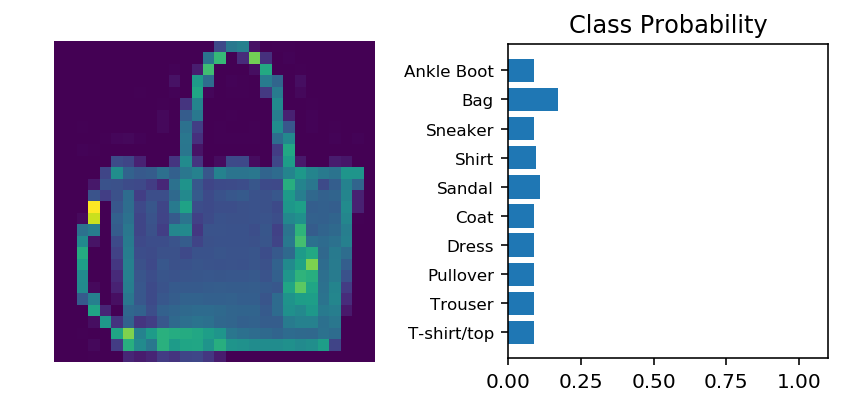

In [28]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model.forward(img)
    
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.